## Importing all the necessary libraries

* pandas, numpy; for mathematical functions and dataframes
* seaborn and matplotlib; plotting the data
* datetime; for dates
* pandas_datareader; access to the OHLCV data
* statsmodels; for cointegration, statistical tests


In [1]:
import pandas as pd
import numpy as np
import yfinance as yf

import seaborn as sns
import matplotlib.pyplot as plt


import datetime as dt
from pandas_datareader import data as pdr

import statsmodels.tsa.stattools as ts
import statsmodels.api as sm

## Defining the inputs


In [2]:
start = dt.datetime(2013, 1, 1)
end = dt.datetime(2019, 1, 1)


ticker_polskie = ['STX','BDX','ALE','DNP']

## Downloading OHLCV data using pandas datareader

In [3]:
df = pdr.DataReader(ticker_polskie, 'stooq', start, end)

In [4]:
df

Attributes    Close                                 High                     \
Symbols         STX       BDX      ALE      DNP      STX       BDX      ALE   
Date                                                                          
2018-12-31  32.7903  213.6570  66.2587  7.90485  33.2053  214.2310  66.3206   
2018-12-28  32.5846  210.5000  65.8327  7.92825  33.1887  212.7670  66.6333   
2018-12-27  32.6601  210.7180  65.5394  7.93595  32.6777  210.7480  65.5733   
2018-12-26  32.2116  206.6010  64.5732  7.87616  32.2615  206.6210  64.9740   
2018-12-24  30.6981  199.0210  64.0610  7.58970  31.4382  202.7120  67.6411   
...             ...       ...      ...      ...      ...       ...      ...   
2013-01-08  19.6622   69.7755  29.8314  4.66636  19.9932   69.7834  29.9796   
2013-01-07  19.7180   69.1590  29.8470  4.66146  19.9872   69.4756  30.1965   
2013-01-04  19.7004   68.9255  30.1965  4.67116  19.8139   69.1432  30.3019   
2013-01-03  19.6573   68.9620  29.7056  4.63757  20.0440   69.2718  29.7327   
2013-01-02  20.0118   68.1545  29.6137  4.58482  20.0440   68.1545  29.6543   

Attributes               Low                                 Open            \
Symbols         DNP      STX       BDX      ALE      DNP      STX       BDX   
Date                                                                          
2018-12-31  8.08835  32.3741  211.3020  65.0330  7.84344  32.7971  212.1530   
2018-12-28  8.04918  32.1167  209.6000  65.1559  7.87471  32.7462  212.3010   
2018-12-27  7.95101  31.4382  202.9690  63.4957  7.75544  31.8621  204.2960   
2018-12-26  7.95908  30.0606  197.8240  62.9564  7.57463  30.9026  199.5360   
2018-12-24  7.85408  30.3681  198.9720  63.9817  7.55095  30.6902  202.4150   
...             ...      ...       ...      ...      ...      ...       ...   
2013-01-08  4.67577  19.3058   68.5158  29.6921  4.61359  19.6172   69.1847   
2013-01-07  4.69957  19.5222   68.7562  29.8470  4.60418  19.6367   68.7651   
2013-01-04  4.69957  19.4869   68.7731  29.6921  4.64237  19.7122   69.1343   
2013-01-03  4.64689  19.6172   68.3357  29.4393  4.57079  20.0000   68.5415   
2013-01-02  4.60860  19.5878   67.5350  29.0733  4.55572  19.7865   67.9942   

Attributes                          Volume                               \
Symbols         ALE      DNP           STX           BDX            ALE   
Date                                                                      
2018-12-31  65.8143  7.98239  3.058215e+06  7.018057e+05  236048.728816   
2018-12-28  65.4852  7.98239  3.320813e+06  8.600122e+05  250251.606531   
2018-12-27  64.2170  7.92825  3.676510e+06  1.254104e+06  340740.981029   
2018-12-26  64.1220  7.66485  5.009794e+06  1.033677e+06  383848.522534   
2018-12-24  67.6411  7.83040  3.430821e+06  9.572695e+05  154072.817454   
...             ...      ...           ...           ...            ...   
2013-01-08  29.7956  4.63757  1.350080e+07  1.367591e+06  197096.691097   
2013-01-07  30.1780  4.69526  8.930779e+06  9.478184e+05  221918.156660   
2013-01-04  29.8586  4.66636  7.217375e+06  1.030924e+06  466054.778749   
2013-01-03  29.6775  4.59949  7.900608e+06  1.368677e+06  357503.475543   
2013-01-02  29.1499  4.57079  1.188668e+07  1.178882e+06  428715.155002   

Attributes                
Symbols              DNP  
Date                      
2018-12-31  9.487250e+05  
2018-12-28  7.913784e+05  
2018-12-27  6.169206e+05  
2018-12-26  1.223545e+06  
2018-12-24  9.359351e+05  
...                  ...  
2013-01-08  6.002377e+05  
2013-01-07  1.153167e+06  
2013-01-04  8.236490e+05  
2013-01-03  8.926460e+05  
2013-01-02  1.141288e+06  

[1510 rows x 20 columns]

In [5]:
df_close = df['Close']

## Correlation matrix between closing prices of stocks

<Axes: xlabel='Symbols', ylabel='Symbols'>

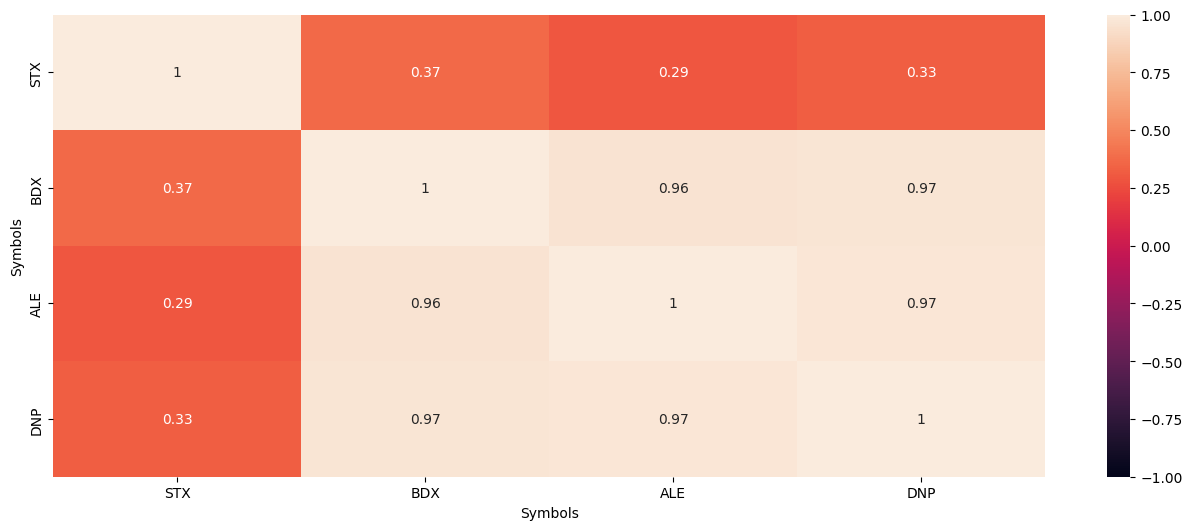

In [6]:
plt.figure(figsize=(16, 6))

sns.heatmap(df_close.corr(), vmin=-1, vmax=1, annot=True)

## Separating close prices of BDX and ALE to variables, and plotting the line chart of prices

In [7]:
bdx_close = df_close['BDX']
ale_close = df_close['ALE']
print(ale_close)

Date
2018-12-31    66.2587
2018-12-28    65.8327
2018-12-27    65.5394
2018-12-26    64.5732
2018-12-24    64.0610
               ...   
2013-01-08    29.8314
2013-01-07    29.8470
2013-01-04    30.1965
2013-01-03    29.7056
2013-01-02    29.6137
Name: ALE, Length: 1510, dtype: float64


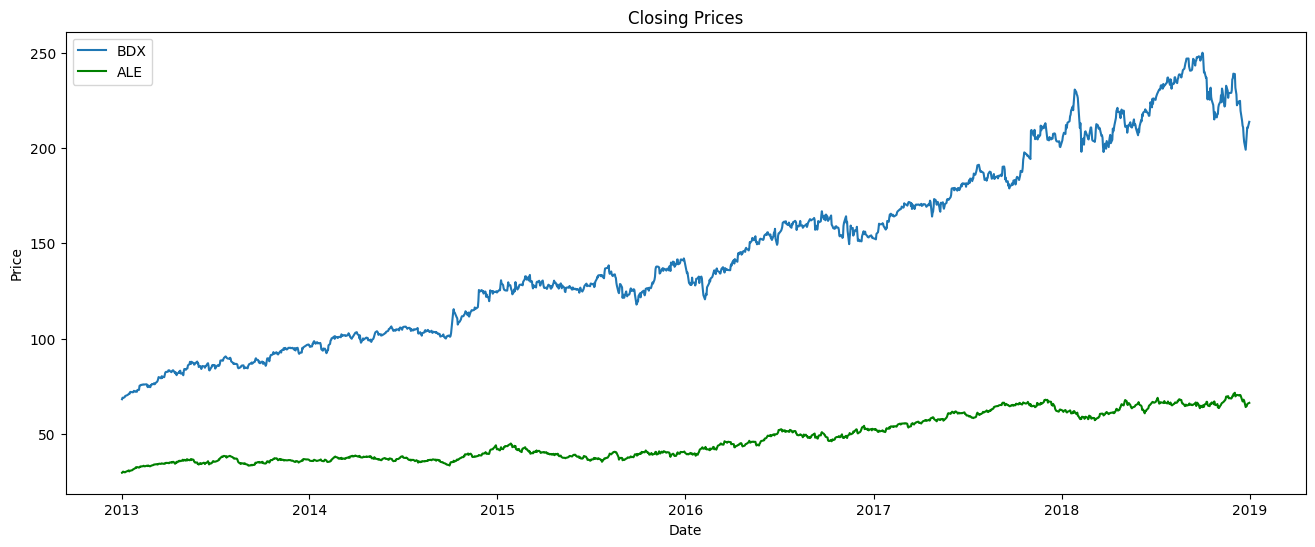

In [25]:
plt.figure(figsize=(16,6))


plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Closing Prices')
plt.plot(bdx_close, label='BDX')
plt.plot(ale_close, label='ALE', color="green")
plt.legend()
plt.show()

## Calculating hedge ratio, and spread

Y variable is BDX
X variable is ALE


In [9]:
Y = bdx_close
X = ale_close

X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
beta = model.params[1]

print(f'Hedge Ratio (Beta): {beta}')
spread = bdx_close - beta * ale_close
spread

Hedge Ratio (Beta): 3.8385662185692873


<ipython-input-9-807b82c24312>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = model.params[1]


,0
Date,
2018-12-31,-40.681408
2018-12-28,-42.203178
2018-12-27,-40.859327
2018-12-26,-41.267504
2018-12-24,-46.881391
...,...
2013-01-08,-44.734304
2013-01-07,-45.410686
2013-01-04,-46.985765


## Augmented Dickey-Fulley test for stationarity of time series (spread)

H0: Spread is not stationary

H1: Spread is stationary

Requirement for this strategy is the spread needs to be stationary.

In [10]:
adf_test = ts.adfuller(spread)

print(f'ADF Statistic: {adf_test[0]}, p-value: {adf_test[1]}')

if adf_test[1] < 0.05:
    print("Null hypothesis is rejected - Spread is stationary")
else:
    print("Fail to reject Null hypothesis - Spread is not stationary")

ADF Statistic: -3.4059673986645866, p-value: 0.010757117750500336
Null hypothesis is rejected - Spread is stationary


## Standardizing the spread


In [11]:
z_scores = (spread -spread.mean())/spread.std()

## Creating bounds for signals, and visualizing the z_scores time series.

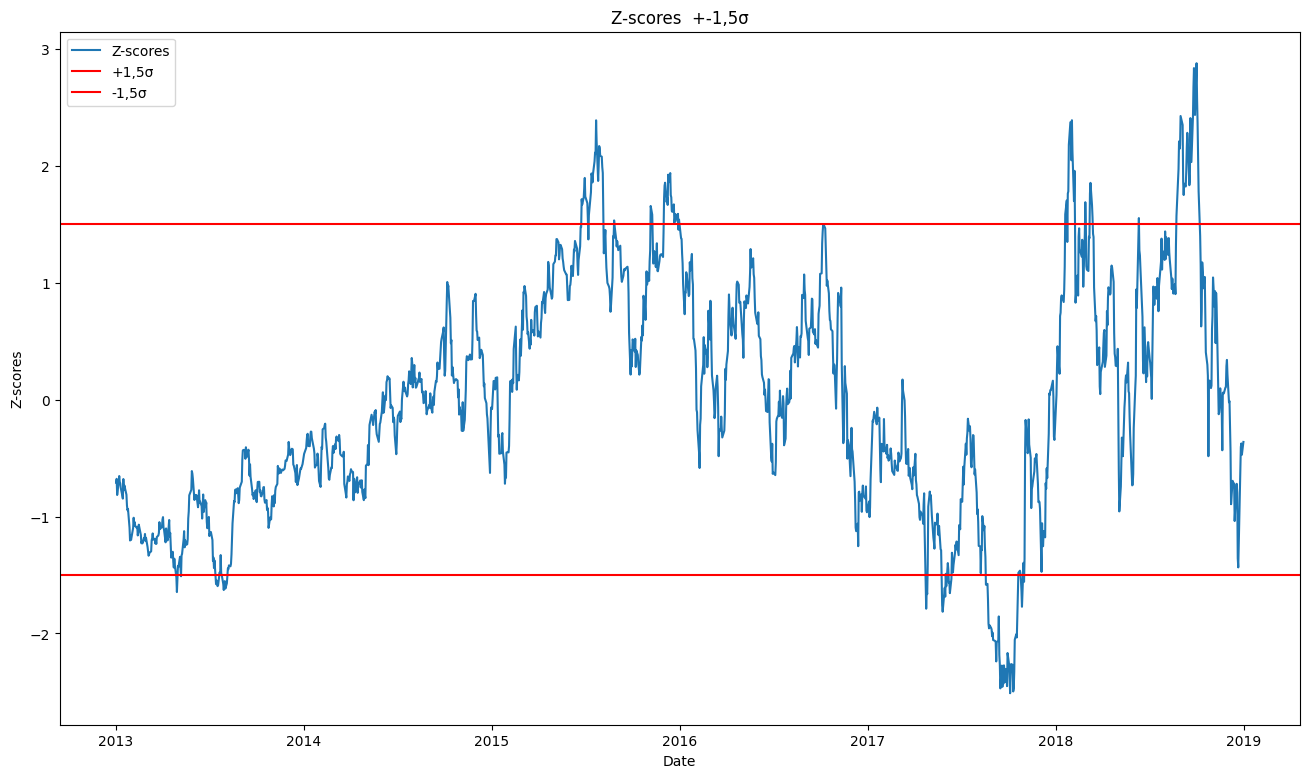

In [26]:
band = 1.5
plt.figure(figsize=(16,9))
# --- Z-scores
plt.plot(z_scores, label="Z-scores")

# --- Bands
plt.axhline(band, color="red", label="+1,5σ")
plt.axhline(-1 *band, color="red", label="-1,5σ")

plt.title("Z-scores  +-1,5σ")
plt.xlabel("Date")
plt.ylabel("Z-scores")
plt.legend(loc='upper left')
plt.show()

## Long and short signals

In [13]:
long_signal = (z_scores.shift(1) >= -1.5) & (z_scores < -1.5)
short_signal = (z_scores.shift(1) <= 1.5) & (z_scores > 1.5)

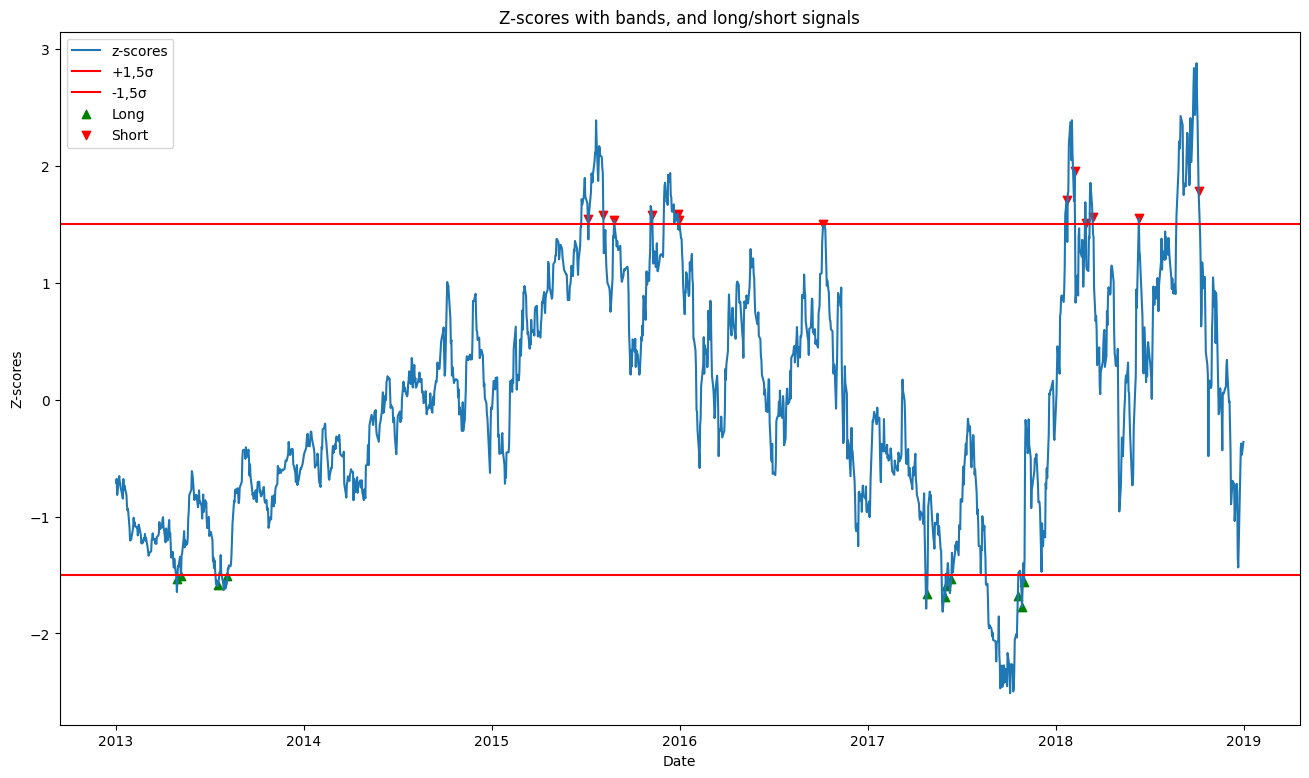

In [14]:
plt.figure(figsize=(16,9))

plt.plot(z_scores, label="z-scores")
plt.axhline(band, color="red", label="+1,5σ")
plt.axhline(-1 *band, color="red", label="-1,5σ")

plt.scatter(z_scores.index[long_signal], z_scores[long_signal], color='green', marker='^', label='Long', alpha=1)
plt.scatter(z_scores.index[short_signal], z_scores[short_signal], color='red', marker='v', label='Short', alpha=1)

plt.title("Z-scores with bands, and long/short signals")
plt.xlabel("Date")
plt.ylabel("Z-scores")
plt.legend()
plt.show()

# BACKTEST SECTION

## Creating dataframe with prices and signals

In [15]:
trade_df = pd.concat([bdx_close,ale_close,long_signal,short_signal], axis=1)
trade_df.columns = ['Close Long', 'Close Short', 'Long Signal', 'Short Signal']
trade_df

,Close Long,Close Short,Long Signal,Short Signal
Date,,,,
2018-12-31,213.6570,66.2587,False,False
2018-12-28,210.5000,65.8327,False,False
2018-12-27,210.7180,65.5394,False,False
2018-12-26,206.6010,64.5732,False,False
2018-12-24,199.0210,64.0610,False,False
...,...,...,...,...
2013-01-08,69.7755,29.8314,False,False
2013-01-07,69.1590,29.8470,False,False
2013-01-04,68.9255,30.1965,False,False


## Backtest and summary of trade

In [23]:

initial_cash = 0
cash = initial_cash
positions = []

returns = []

position_open = False
position_type = None
entry_bdx = 0
entry_ale = 0

for i in range(1, len(trade_df)):
    if long_signal.iloc[i]:
        position_open = True
        position_type = 'long'
        entry_bdx = bdx_close.iloc[i]
        entry_ale = ale_close.iloc[i]
    elif short_signal.iloc[i]:
        position_open = True
        position_type = 'short'
        entry_bdx = bdx_close.iloc[i]
        entry_ale = ale_close.iloc[i]

    if position_open:
        current_bdx = bdx_close.iloc[i]
        current_ale = ale_close.iloc[i]

        if position_type == 'long':
            pnl = (current_bdx - entry_bdx) - beta * (current_ale - entry_ale)
        elif position_type == 'short':
            pnl = (entry_bdx - current_bdx) - beta * (entry_ale - current_ale)
        else:
            pnl = 0

        returns.append(pnl)

        if abs(z_scores.iloc[i]) < 0.5:
            cash += pnl
            position_open = False
            position_type = None

total_pnl = sum(returns)
num_trades = len(returns)
average_pnl = total_pnl / num_trades if num_trades > 0 else 0
max_drawdown = min(returns) if returns else 0
sharpe_ratio = np.mean(returns) / np.std(returns) * np.sqrt(252) if np.std(returns) > 0 else 0


summary_df = pd.DataFrame({
    'Miary': [
        'Łączny zysk/strata',
        'Liczba transakcji',
        'Średni zysk na transakcję',
        'Max Drawdown',
        'Sharpe Ratio'
    ],
    'Wartości': [
        round(total_pnl, 2),
        num_trades,
        round(average_pnl, 2),
        round(max_drawdown, 2),
        round(sharpe_ratio, 2)
    ]
})

In [24]:
from tabulate import tabulate
print(tabulate(summary_df, headers='keys', tablefmt='fancy_grid', showindex=False))

╒═══════════════════════════╤════════════╕
│ Miary                     │   Wartości │
╞═══════════════════════════╪════════════╡
│ Łączny zysk/strata        │    2173.47 │
├───────────────────────────┼────────────┤
│ Liczba transakcji         │     559    │
├───────────────────────────┼────────────┤
│ Średni zysk na transakcję │       3.89 │
├───────────────────────────┼────────────┤
│ Max Drawdown              │     -15.22 │
├───────────────────────────┼────────────┤
│ Sharpe Ratio              │       9.61 │
╘═══════════════════════════╧════════════╛
